<a href="https://colab.research.google.com/github/putriarta/Data-Analytics/blob/main/Business_Decision_Research.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
#import library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score

### Importing Data and General Inspection 
Using data_retail dataset from dqlab and perform general inspections

In [3]:
df = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/data_retail.csv', sep=';')

In [4]:
pd.set_option('display.max_columns',None)
print("First 5 records: \n", df.head())

First 5 records: 
    no  Row_Num  Customer_ID Product  First_Transaction  Last_Transaction  \
0   1        1        29531   Jaket      1466304274396     1538718482608   
1   2        2        29531  Sepatu      1406077331494     1545735761270   
2   3        3       141526     Tas      1493349147000     1548322802000   
3   4        4       141526   Jaket      1493362372547     1547643603911   
4   5        5        37545  Sepatu      1429178498531     1542891221530   

   Average_Transaction_Amount  Count_Transaction  
0                     1467681                 22  
1                     1269337                 41  
2                      310915                 30  
3                      722632                 27  
4                     1775036                 25  


In [5]:
print('The shape/size of dataset: ', df.shape)

The shape/size of dataset:  (100000, 8)


In [6]:
print('Dataset info: ')
print(df.info())

Dataset info: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   no                          100000 non-null  int64 
 1   Row_Num                     100000 non-null  int64 
 2   Customer_ID                 100000 non-null  int64 
 3   Product                     100000 non-null  object
 4   First_Transaction           100000 non-null  int64 
 5   Last_Transaction            100000 non-null  int64 
 6   Average_Transaction_Amount  100000 non-null  int64 
 7   Count_Transaction           100000 non-null  int64 
dtypes: int64(7), object(1)
memory usage: 6.1+ MB
None


### Data Cleaning
- Transform 'First_Transaction' and 'Last_Transaction' columns from int to datetime for a better use of analysis
- Drop the columns that will not be used in this analysis, which are 'no' and 'Row_Num' columns

In [7]:
df['First_Transaction'] = pd.to_datetime(df['First_Transaction']/1000, unit='s', origin='1970-01-01')

df['Last_Transaction'] = pd.to_datetime(df['Last_Transaction']/1000, unit='s', origin='1970-01-01')

In [8]:
print('First 5 records: \n', df.head())

First 5 records: 
    no  Row_Num  Customer_ID Product             First_Transaction  \
0   1        1        29531   Jaket 2016-06-19 02:44:34.395999908   
1   2        2        29531  Sepatu 2014-07-23 01:02:11.493999958   
2   3        3       141526     Tas 2017-04-28 03:12:27.000000000   
3   4        4       141526   Jaket 2017-04-28 06:52:52.546999931   
4   5        5        37545  Sepatu 2015-04-16 10:01:38.530999899   

               Last_Transaction  Average_Transaction_Amount  Count_Transaction  
0 2018-10-05 05:48:02.608000040                     1467681                 22  
1 2018-12-25 11:02:41.269999981                     1269337                 41  
2 2019-01-24 09:40:02.000000000                      310915                 30  
3 2019-01-16 13:00:03.911000013                      722632                 27  
4 2018-11-22 12:53:41.529999970                     1775036                 25  


In [9]:
print('Dataset info:')
print(df.info())

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   no                          100000 non-null  int64         
 1   Row_Num                     100000 non-null  int64         
 2   Customer_ID                 100000 non-null  int64         
 3   Product                     100000 non-null  object        
 4   First_Transaction           100000 non-null  datetime64[ns]
 5   Last_Transaction            100000 non-null  datetime64[ns]
 6   Average_Transaction_Amount  100000 non-null  int64         
 7   Count_Transaction           100000 non-null  int64         
dtypes: datetime64[ns](2), int64(5), object(1)
memory usage: 6.1+ MB
None


In [10]:
del df['no']
del df['Row_Num']

print('First 5 records: \n', df.head())

First 5 records: 
    Customer_ID Product             First_Transaction  \
0        29531   Jaket 2016-06-19 02:44:34.395999908   
1        29531  Sepatu 2014-07-23 01:02:11.493999958   
2       141526     Tas 2017-04-28 03:12:27.000000000   
3       141526   Jaket 2017-04-28 06:52:52.546999931   
4        37545  Sepatu 2015-04-16 10:01:38.530999899   

               Last_Transaction  Average_Transaction_Amount  Count_Transaction  
0 2018-10-05 05:48:02.608000040                     1467681                 22  
1 2018-12-25 11:02:41.269999981                     1269337                 41  
2 2019-01-24 09:40:02.000000000                      310915                 30  
3 2019-01-16 13:00:03.911000013                      722632                 27  
4 2018-11-22 12:53:41.529999970                     1775036                 25  


### Churn Customer
- Classify churn customers who didn't have any transaction in the last 6 months 
- Add 'is_churn' column to the dataframe

In [11]:
print('The latest transaction:',max(df['Last_Transaction']))

The latest transaction: 2019-02-01 23:57:57.286000013


In [12]:
df.loc[df['Last_Transaction'] <= '2018-08-01','is_churn']=True
df.loc[df['Last_Transaction'] > '2018-08-01','is_churn']=False

In [13]:
print('First 5 records: \n', df.head())

First 5 records: 
    Customer_ID Product             First_Transaction  \
0        29531   Jaket 2016-06-19 02:44:34.395999908   
1        29531  Sepatu 2014-07-23 01:02:11.493999958   
2       141526     Tas 2017-04-28 03:12:27.000000000   
3       141526   Jaket 2017-04-28 06:52:52.546999931   
4        37545  Sepatu 2015-04-16 10:01:38.530999899   

               Last_Transaction  Average_Transaction_Amount  \
0 2018-10-05 05:48:02.608000040                     1467681   
1 2018-12-25 11:02:41.269999981                     1269337   
2 2019-01-24 09:40:02.000000000                      310915   
3 2019-01-16 13:00:03.911000013                      722632   
4 2018-11-22 12:53:41.529999970                     1775036   

   Count_Transaction is_churn  
0                 22    False  
1                 41    False  
2                 30    False  
3                 27    False  
4                 25    False  


### Data Visualization


#### Customer acquisition by year
The bar chart shows that 2017 was the year with the highest customer acquisition with 31,828 customers.
The acquisition tends to increase from year to year, but there's a slight decrease (-4.71%) from 2017 to 2018.

In [14]:
df['Year_First_Transaction'] = df['First_Transaction'].dt.year
df['Year_Last_Transaction'] = df['Last_Transaction'].dt.year

In [30]:
df_year1 = df.groupby(['Year_First_Transaction'])['Customer_ID'].count()
df_year1

Year_First_Transaction
2013     1007
2014     4954
2015    11235
2016    17656
2017    31828
2018    30327
2019     2993
Name: Customer_ID, dtype: int64

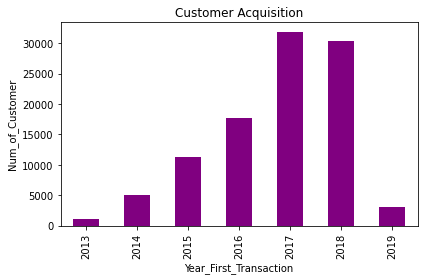

In [80]:
df_year1.plot(x='Year_First_Transaction', y='Customer_ID', kind='bar', title='Customer Acquisition', color='purple')
plt.xlabel('Year_First_Transaction')
plt.ylabel('Num_of_Customer')
plt.tight_layout()
plt.show()

#### Transactions by year
This chart aims to give a visualization of how many transactions happened in a customer's first-year transaction.

In [72]:
df_year2 = df.groupby(['Year_First_Transaction'])['Count_Transaction'].sum()
df_year2

Year_First_Transaction
2013     23154
2014    165494
2015    297445
2016    278707
2017    299199
2018     99989
2019      5862
Name: Count_Transaction, dtype: int64

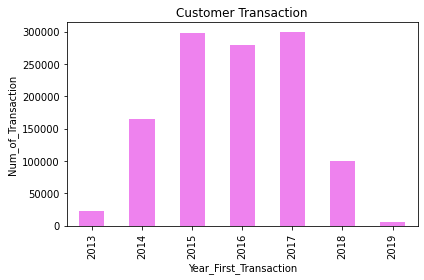

In [81]:
plt.clf()
df_year2.plot(x='Year_First_Transaction', y='Count_Transaction', kind='bar', title='Customer Transaction', color='violet')
plt.xlabel('Year_First_Transaction')
plt.ylabel('Num_of_Transaction')
plt.tight_layout()
plt.show()

#### Comparison between customer acquisition and transaction
This graph aims to visualize the comparison between customer acquisition (customer_Id) and customer transaction (count_transaction).
Year 2018 shows a big decrease i transactions (-66.58%) from 299,199 to 99,989, even though the customer acquisition in 2018 was quite well. This is quite concerning since 2014, 2015, and 2016 which have a lower customer acquisition than 2018, able to gain a bigger amount of transactions compared to 2018.

In [79]:
df.groupby('Year_First_Transaction', as_index=False).agg({'Customer_ID':'count','Count_Transaction': 'sum'})

,Year_First_Transaction,Customer_ID,Count_Transaction
0,2013,1007,23154
1,2014,4954,165494
2,2015,11235,297445
3,2016,17656,278707
4,2017,31828,299199
5,2018,30327,99989
6,2019,2993,5862


<Figure size 432x288 with 0 Axes>

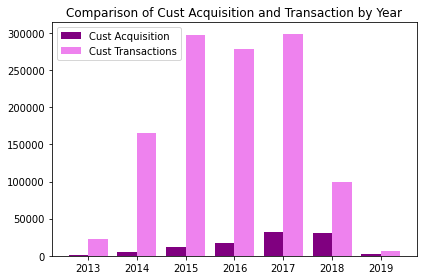

In [73]:
plt.clf()
fig, ax = plt.subplots()
bar_width = 0.4
X = np.arange(7)

plt.bar(X, df_year1 , bar_width, label='Cust Acquisition', color='purple')
plt.bar(X + bar_width, df_year2, bar_width, label='Cust Transactions', color='violet')
plt.xticks(X + (bar_width/2) , ("2013", "2014", "2015", "2016", "2017", "2018", "2019"))
plt.title('Comparison of Cust Acquisition and Transaction by Year')
plt.legend()
plt.tight_layout()
plt.show()

#### Average transaction amount by year
This line chart shows the average customer's first year transaction in every products

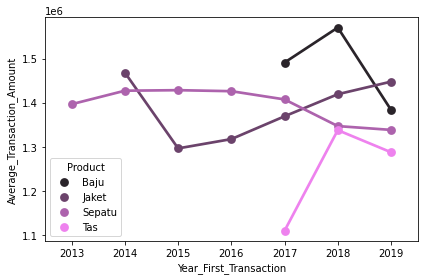

In [83]:
plt.clf()
sns.pointplot(data = df.groupby(['Product', 'Year_First_Transaction']).mean().reset_index(),
              x='Year_First_Transaction',  
              y='Average_Transaction_Amount',
              hue='Product', color = 'violet')
plt.tight_layout()
plt.show()

### Count_Transaction Distribution
This chart aims to show the amount of transaction distribution by the number of customers. It is shown that 49,255 customers having only 1 transaction. By this, the company should retain the customers so they won't leave after having a transaction.

In [92]:
def func(row):
	if row['Count_Transaction'] == 1:
		val = '1'
	elif (row['Count_Transaction'] >1 and row['Count_Transaction'] <= 3):
		val ='2 - 3'
	elif (row['Count_Transaction'] >3 and row['Count_Transaction'] <= 6):
		val ='4 - 6'
	elif (row['Count_Transaction'] >6 and row['Count_Transaction'] <= 10):
		val ='7 - 10'
	else:
		val ='>10'
	return val

In [94]:
df['Count_Transaction_Group'] = df.apply(func, axis=1)
df_year = df.groupby(['Count_Transaction_Group'])['Customer_ID'].count()
df_year

Count_Transaction_Group
1         49255
2 - 3     14272
4 - 6     12126
7 - 10     2890
>10       21457
Name: Customer_ID, dtype: int64

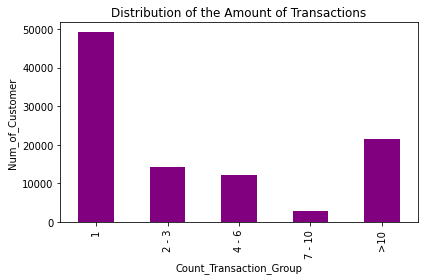

In [95]:
plt.clf()
df_year.plot(x='Count_Transaction_Group', y='Customer_ID', kind='bar', title='Distribution of the Amount of Transactions', color='purple')
plt.xlabel('Count_Transaction_Group')
plt.ylabel('Num_of_Customer')
plt.tight_layout()
plt.show()

### Avg Transactions Amount by the Num of Customers
The chart shows the distribution of the average of transactions amount by the number of customers. It is showed that the highest transaction amount was 1M-2.5M IDR with more than 32819 customers.

In [108]:
def f(row):
	if (row['Average_Transaction_Amount'] >= 100000 and row['Average_Transaction_Amount'] <=200000):
		val ='1. 100K - 250K'
	elif (row['Average_Transaction_Amount'] >250000 and row['Average_Transaction_Amount'] <= 500000):
		val ='2. 250K - 500K'
	elif (row['Average_Transaction_Amount'] >500000 and row['Average_Transaction_Amount'] <= 750000):
		val ='3. 500K - 750K'
	elif (row['Average_Transaction_Amount'] >750000 and row['Average_Transaction_Amount'] <= 1000000):
		val ='4. 750K - 1M'
	elif (row['Average_Transaction_Amount'] >1000000 and row['Average_Transaction_Amount'] <= 2500000):
		val ='5. 1M - 2.5M'
	elif (row['Average_Transaction_Amount'] >2500000 and row['Average_Transaction_Amount'] <= 5000000):
		val ='6. 2.5M - 5M'
	elif (row['Average_Transaction_Amount'] >5000000 and row['Average_Transaction_Amount'] <= 10000000):
		val ='7. 5M - 10M'
	else:
		val ='8. >10M'
	return val

In [109]:
df['Average_Transaction_Amount_Group'] = df.apply(f, axis=1)
df_year = df.groupby(['Average_Transaction_Amount_Group'])['Customer_ID'].count()
df_year

Average_Transaction_Amount_Group
1. 100K - 250K     4912
2. 250K - 500K    18857
3. 500K - 750K    15171
4. 750K - 1M      12298
5. 1M - 2.5M      32819
6. 2.5M - 5M       9027
7. 5M - 10M        3689
8. >10M            3227
Name: Customer_ID, dtype: int64

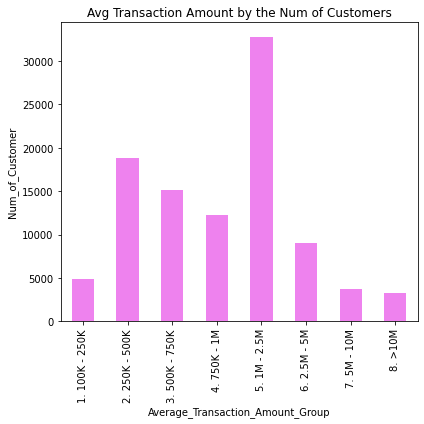

In [110]:
plt.clf()

df_year.plot(figsize=(6,6),x='Average_Transaction_Amount_Group', y='Customer_ID',kind='bar', title='Avg Transaction Amount by the Num of Customers',color='violet')
plt.xlabel('Average_Transaction_Amount_Group')
plt.ylabel('Num_of_Customer')
plt.tight_layout()
plt.show()

### Churned customer proportion for each product
The pie chart aims to show the proportion of churned customer after buying a product. The churned percentage is about 60-68% in each product, means that the variety of product doesn't affect the percentage of the churned customer. The company should perform some improvements to the products to decrease the percentage of the churned customer.

<Figure size 432x288 with 0 Axes>

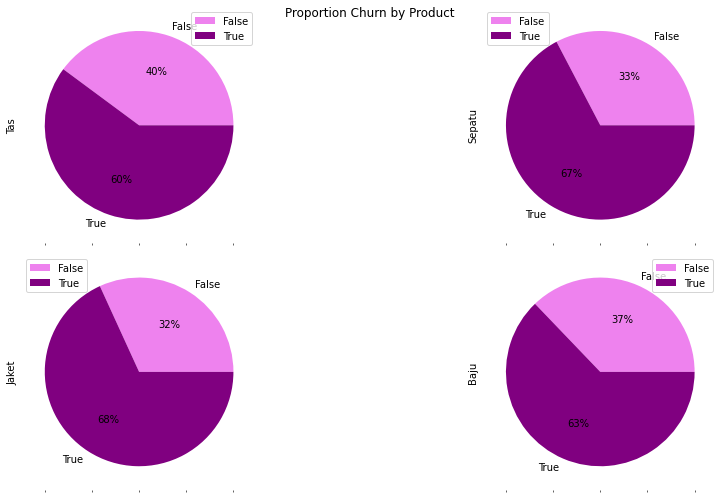

In [111]:
plt.clf()

# Melakukan pivot data
df_piv = df.pivot_table(index='is_churn',
                        columns='Product',
                        values='Customer_ID',
                        aggfunc='count',
                        fill_value=0)

# Mendapatkan Proportion Churn by Product
plot_product = df_piv.count().sort_values(ascending=False).head(5).index

# Plot pie chartnya
colors = ['violet','purple']
df_piv = df_piv.reindex(columns=plot_product)
df_piv.plot.pie(subplots=True,
                figsize=(16, 7),
                layout=(-1, 2),
                autopct='%1.0f%%',
                title='Proportion Churn by Product',
                colors=colors)
plt.tight_layout()
plt.show()

### Logistic Regression to predict the churned customer
With a total accuracy of 0.66668, it seems like the feature variables do not define the target variable well(which is is_churn/whether the customer churned or not). For further study, it can be implemented with another data science algorithm.

In [22]:
# Feature column: Year_Diff
df['Year_Diff']=df['Year_Last_Transaction']-df['Year_First_Transaction']

feature_columns = ['Average_Transaction_Amount', 'Count_Transaction', 'Year_Diff']

# Features variable
X = df[feature_columns]

# Target variable
y = df['is_churn']
y = y.astype('str')

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [112]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train, y_train)

# Predict model
y_pred = logreg.predict(X_test)

# Evaluate the model
cnf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:\n', cnf_matrix)

Confusion Matrix:
 [[    1  8330]
 [    3 16666]]


<Figure size 432x288 with 0 Axes>

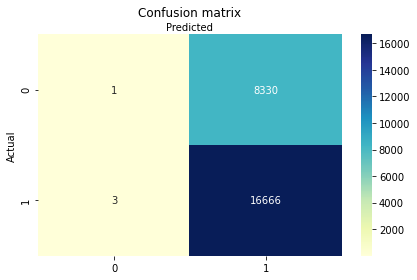

In [113]:
plt.clf()

# name of classes
class_names = [0, 1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap='YlGnBu', fmt='g')
ax.xaxis.set_label_position('top')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.tight_layout()
plt.show()

In [26]:
print('Accuracy :', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred, average='micro'))
print('Recall :', recall_score(y_test, y_pred, average='micro'))

Accuracy : 0.66668
Precision: 0.66668
Recall : 0.66668
